[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W4/W4P2.ipynb)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def create_ma(A : np.array, theta : np.array, c_0: float = 0):
  p = len(theta)-1 ### theta is here our coefficients  and A is our samples, we can constantly create models outta it!
  L = [] 
  L.append(c_0)
  i = 0
  while True:   #### why we have a while loop here who is going to explain????? 
    try:
      dot = c_0+theta[0]-np.dot(theta[1:], A[i:i+p])   ### explain here very clearly!
      L.append(dot)
      i += 1
    except Exception:
      return L


In [ ]:
theta = np.random.randn(45)  ### these are your weights
A = np.random.randn(100000)   #### these are your sample a_t white noise!

In [ ]:
L = create_ma(A, theta ,c_0 = 5)

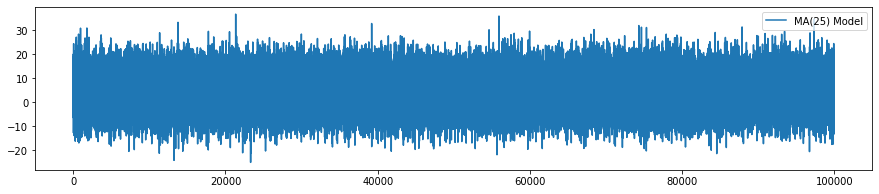

In [ ]:

plt.figure(figsize = (15,3))
plt.plot(L, label = "MA(25) Model")
plt.legend(fontsize = 10)
plt.show()

In [ ]:
np.mean(L)

4.365833787644436

In [ ]:
np.var(L)

46.38915367896032

In [ ]:
variance = (1+sum([i**2 for i in theta]))
print(variance)

48.119586439835565


See these two guys are almost the same, above we have the variance of the series. Below we have the variance coming from the formula!

In [ ]:
import statsmodels

In [ ]:
statsmodels.__version__

'0.12.2'

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

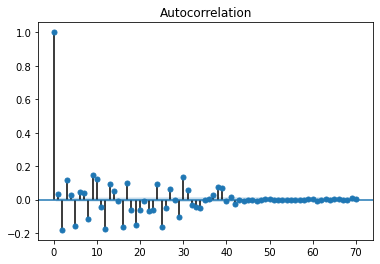

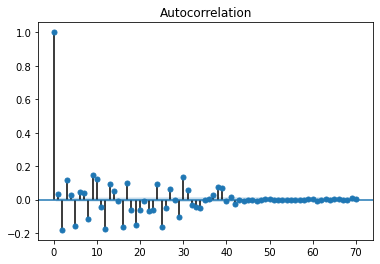

In [ ]:
plot_acf(np.array(L), alpha = 0.001, lags = 70)   ###### Brace yourself and witness the power of science!

In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
acf_ = acf(np.array(L), nlags = 100)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [ ]:
acf_  #### this dude is a numpy array

array([ 1.00000000e+00,  3.16080275e-02, -1.81027206e-01,  1.14992182e-01,
        2.83439704e-02, -1.60459818e-01,  4.40171392e-02,  4.06390071e-02,
       -1.16608123e-01,  1.45362748e-01,  1.25530268e-01, -4.57234385e-02,
       -1.75761100e-01,  9.46443155e-02,  4.88430858e-02, -7.98621064e-03,
       -1.65857924e-01,  9.63607436e-02, -6.34292498e-02, -1.50105289e-01,
       -6.05351872e-02, -1.11705769e-02, -6.98280246e-02, -6.31882450e-02,
        9.58471240e-02, -1.63833783e-01, -5.09506852e-02,  6.32600250e-02,
       -1.69849442e-03, -1.01425041e-01,  1.32602955e-01,  5.90350021e-02,
       -3.12945477e-02, -4.53619920e-02, -5.21190347e-02, -1.04823146e-03,
        1.83621510e-03,  3.03982901e-02,  7.37249294e-02,  6.73703192e-02,
       -7.57987073e-03,  1.37931377e-02, -2.66579293e-02, -5.12316282e-03,
       -8.66069185e-03, -2.15891979e-03, -3.72423651e-03, -5.99044249e-03,
       -3.10062846e-03,  5.69934411e-03,  5.38536830e-03, -3.21284809e-04,
        4.05174072e-04, -

In [ ]:
np.argsort(acf_)[::-1]  ### we invert the order

array([  0,   9,  30,  10,   3,  17,  24,  13,  38,  39,  27,  31,  14,
         6,   7,   1,  37,   4,  41,  79,  69,  49,  50,  96,  78,  66,
        70,  93,  59,  89,  63,  80,  65, 100,  36,  60,  92,  76,  82,
        56,  52,  72,  64,  67,  73,  91,  51,  57,  83,  87,  35,  54,
        99,  53,  90,  68,  75,  95,  28,  55,  86,  45,  58,  85,  94,
        81,  62,  74,  48,  88,  46,  77,  97,  43,  47,  84,  61,  98,
        71,  40,  15,  44,  21,  42,  32,  33,  11,  26,  34,  20,  23,
        18,  22,  29,   8,  19,   5,  25,  16,  12,   2])

In [ ]:
np.sum(abs(acf_) >= 1e-2)

39